# **Clustring without using PCA**


1) Hierarchical clustering

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_csv("wine.csv")
df=pd.read_csv("wine.csv")
df.head()

Type  Alcohol  Malic   Ash  ...  Color   Hue  Dilution  Proline
0     1    14.23   1.71  2.43  ...   5.64  1.04      3.92     1065
1     1    13.20   1.78  2.14  ...   4.38  1.05      3.40     1050
2     1    13.16   2.36  2.67  ...   5.68  1.03      3.17     1185
3     1    14.37   1.95  2.50  ...   7.80  0.86      3.45     1480
4     1    13.24   2.59  2.87  ...   4.32  1.04      2.93      735

[5 rows x 14 columns]

In [3]:
df.shape

(178, 14)

In [4]:
df["Type"].value_counts()    #Types of wine we have

2    71
1    59
3    48
Name: Type, dtype: int64

In [5]:
df.iloc[:,1:].describe()

Alcohol       Malic         Ash  ...         Hue    Dilution      Proline
count  178.000000  178.000000  178.000000  ...  178.000000  178.000000   178.000000
mean    13.000618    2.336348    2.366517  ...    0.957449    2.611685   746.893258
std      0.811827    1.117146    0.274344  ...    0.228572    0.709990   314.907474
min     11.030000    0.740000    1.360000  ...    0.480000    1.270000   278.000000
25%     12.362500    1.602500    2.210000  ...    0.782500    1.937500   500.500000
50%     13.050000    1.865000    2.360000  ...    0.965000    2.780000   673.500000
75%     13.677500    3.082500    2.557500  ...    1.120000    3.170000   985.000000
max     14.830000    5.800000    3.230000  ...    1.710000    4.000000  1680.000000

[8 rows x 13 columns]

In [6]:
#Standarizing data before procedure
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
df_norm=scalar.fit_transform(df.iloc[:,1:])

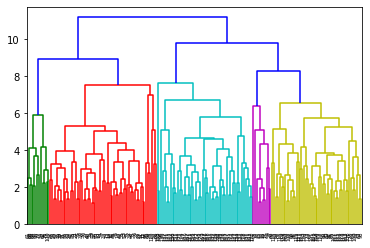

In [7]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))


In [8]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [9]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)

In [10]:
df["Cluster"]=y_hc
df

Type  Alcohol  Malic   Ash  ...   Hue  Dilution  Proline  Cluster
0       1    14.23   1.71  2.43  ...  1.04      3.92     1065        1
1       1    13.20   1.78  2.14  ...  1.05      3.40     1050        1
2       1    13.16   2.36  2.67  ...  1.03      3.17     1185        1
3       1    14.37   1.95  2.50  ...  0.86      3.45     1480        1
4       1    13.24   2.59  2.87  ...  1.04      2.93      735        0
..    ...      ...    ...   ...  ...   ...       ...      ...      ...
173     3    13.71   5.65  2.45  ...  0.64      1.74      740        2
174     3    13.40   3.91  2.48  ...  0.70      1.56      750        2
175     3    13.27   4.28  2.26  ...  0.59      1.56      835        2
176     3    13.17   2.59  2.37  ...  0.60      1.62      840        2
177     3    14.13   4.10  2.74  ...  0.61      1.60      560        2

[178 rows x 15 columns]

In [11]:
cluster=pd.DataFrame({"Cluster":[0,1,2,3],"counts":[[df[df["Cluster"]==0].shape[0]],
                                                      [df[df["Cluster"]==1].shape[0]],
                                                      [df[df["Cluster"]==2].shape[0]],
                                                      [df[df["Cluster"]==3].shape[0]]
                                                                                       ]})
cluster

Cluster counts
0        0   [58]
1        1   [57]
2        2   [51]
3        3   [12]

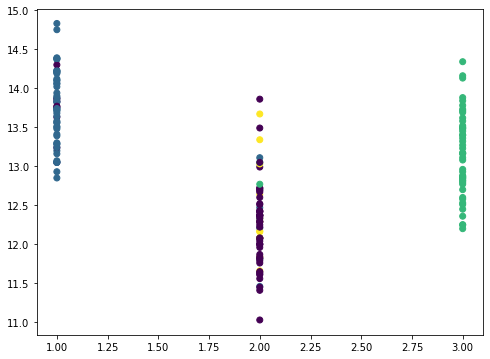

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df["Cluster"])

# **K_Means**

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

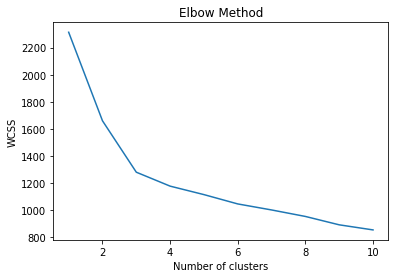

In [14]:
#We already have normalized data
#finding optimum no. of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [15]:
#As we can see elbow is formed at 3 
#Therefore we taking
n=3
#Build Cluster algorithm
clusters_new = KMeans(n, random_state=42)
clusters_new.fit(df_norm)

KMeans(n_clusters=3, random_state=42)

In [16]:
df2=data
df2["Cluster"]=clusters_new.labels_
df2

Type  Alcohol  Malic   Ash  ...   Hue  Dilution  Proline  Cluster
0       1    14.23   1.71  2.43  ...  1.04      3.92     1065        1
1       1    13.20   1.78  2.14  ...  1.05      3.40     1050        1
2       1    13.16   2.36  2.67  ...  1.03      3.17     1185        1
3       1    14.37   1.95  2.50  ...  0.86      3.45     1480        1
4       1    13.24   2.59  2.87  ...  1.04      2.93      735        1
..    ...      ...    ...   ...  ...   ...       ...      ...      ...
173     3    13.71   5.65  2.45  ...  0.64      1.74      740        0
174     3    13.40   3.91  2.48  ...  0.70      1.56      750        0
175     3    13.27   4.28  2.26  ...  0.59      1.56      835        0
176     3    13.17   2.59  2.37  ...  0.60      1.62      840        0
177     3    14.13   4.10  2.74  ...  0.61      1.60      560        0

[178 rows x 15 columns]

In [17]:
cluster2=pd.DataFrame({"Clusters":[0,1,2],"counts":[[df2[df2["Cluster"]==0].shape[0]],
                                                      [df2[df2["Cluster"]==1].shape[0]],
                                                      [df2[df2["Cluster"]==2].shape[0]]]})
cluster2

Clusters counts
0         0   [51]
1         1   [62]
2         2   [65]

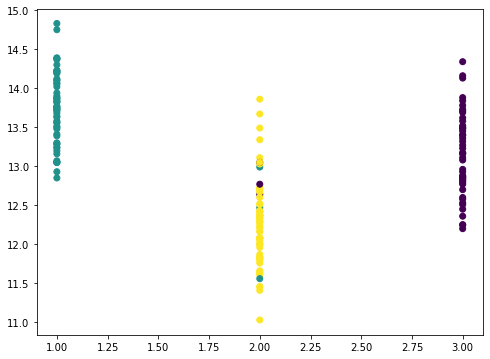

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], c=clusters_new.labels_.astype(float))  #As we can see except few points we got very good cluster according to there type

# **Now Performig PCA and then clustring the data**

In [19]:
#We already ahe normalize data
from sklearn.preprocessing import scale 
df_norm


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [20]:
from sklearn.decomposition import PCA



In [21]:
pca = PCA(n_components=13)
pca_values = pca.fit_transform(df_norm)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [22]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [23]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

#Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

In [24]:
columns = ['pca_%i' % i for i in range(13)]
df_pca = pd.DataFrame(pca_values, columns=columns, index=df.index)
df_pca.head()


pca_0     pca_1     pca_2  ...    pca_10    pca_11    pca_12
0  3.316751 -1.443463 -0.165739  ... -0.451563  0.540810 -0.066239
1  2.209465  0.333393 -2.026457  ... -0.142657  0.388238  0.003637
2  2.516740 -1.031151  0.982819  ... -0.286673  0.000584  0.021717
3  3.757066 -2.756372 -0.176192  ...  0.759584 -0.242020 -0.369484
4  1.008908 -0.869831  2.026688  ... -0.525945 -0.216664 -0.079364

[5 rows x 13 columns]

#Using 3 pca values for clustring

1) Hierarchical Clustring

In [25]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn


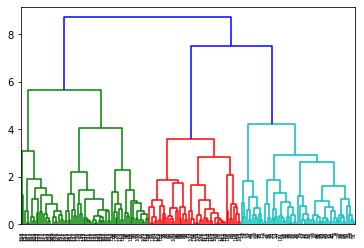

In [26]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_pca.iloc[:,0:2], method='complete'))


In [27]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
# save clusters for chart
y_hc = hc.fit_predict(df_pca.iloc[:,0:2])

In [28]:
df_h_c=data
df_h_c["Cluster"]=y_hc
df_h_c

Type  Alcohol  Malic   Ash  ...   Hue  Dilution  Proline  Cluster
0       1    14.23   1.71  2.43  ...  1.04      3.92     1065        1
1       1    13.20   1.78  2.14  ...  1.05      3.40     1050        1
2       1    13.16   2.36  2.67  ...  1.03      3.17     1185        1
3       1    14.37   1.95  2.50  ...  0.86      3.45     1480        1
4       1    13.24   2.59  2.87  ...  1.04      2.93      735        1
..    ...      ...    ...   ...  ...   ...       ...      ...      ...
173     3    13.71   5.65  2.45  ...  0.64      1.74      740        0
174     3    13.40   3.91  2.48  ...  0.70      1.56      750        0
175     3    13.27   4.28  2.26  ...  0.59      1.56      835        0
176     3    13.17   2.59  2.37  ...  0.60      1.62      840        0
177     3    14.13   4.10  2.74  ...  0.61      1.60      560        0

[178 rows x 15 columns]

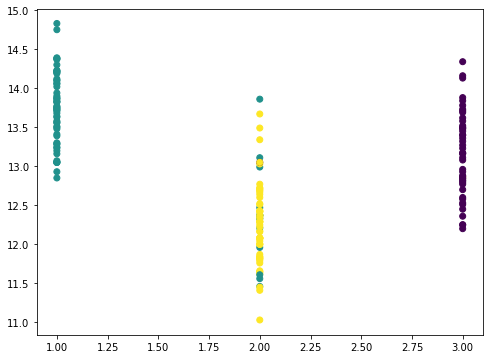

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df_h_c.iloc[:,0], df_h_c.iloc[:,1], c=df_h_c["Cluster"])   

As we can see there are some point of type 1 wine is cluster with type two wine in hirechrical clustring due to loss of information. It can improve if we use more pca values 

# **k-Means**

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

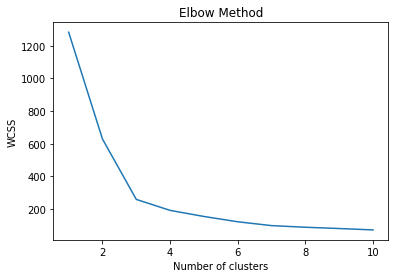

In [31]:
#We already have normalized data
#finding optimum no. of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_pca.iloc[:,0:2])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [32]:
#As we can see elbow is formed at 3 
#Therefore we taking
n=3
#Build Cluster algorithm
clusters_new_k = KMeans(n, random_state=42)
clusters_new_k.fit(df_pca.iloc[:,0:2])

KMeans(n_clusters=3, random_state=42)

In [33]:
df_k=data
df_k["Cluster"]=clusters_new_k.labels_
df_k

Type  Alcohol  Malic   Ash  ...   Hue  Dilution  Proline  Cluster
0       1    14.23   1.71  2.43  ...  1.04      3.92     1065        1
1       1    13.20   1.78  2.14  ...  1.05      3.40     1050        1
2       1    13.16   2.36  2.67  ...  1.03      3.17     1185        1
3       1    14.37   1.95  2.50  ...  0.86      3.45     1480        1
4       1    13.24   2.59  2.87  ...  1.04      2.93      735        1
..    ...      ...    ...   ...  ...   ...       ...      ...      ...
173     3    13.71   5.65  2.45  ...  0.64      1.74      740        0
174     3    13.40   3.91  2.48  ...  0.70      1.56      750        0
175     3    13.27   4.28  2.26  ...  0.59      1.56      835        0
176     3    13.17   2.59  2.37  ...  0.60      1.62      840        0
177     3    14.13   4.10  2.74  ...  0.61      1.60      560        0

[178 rows x 15 columns]

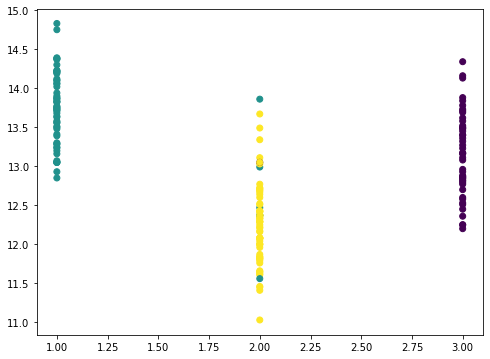

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(df_k.iloc[:,0], df_k.iloc[:,1], c=df_k["Cluster"])   

# **conclusion:**
           As we see in graph there are some point of type 1 wine clustered with type 2 wine .it may because of loss of information. we can use more pca values to increase accurancy